EXERCISE 3.1:

In [28]:
import numpy as np 
from scipy.linalg import eigh
import scipy.sparse as sp
from scipy.sparse.linalg import eigs
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.sparse import csr_matrix


## dingen om nog naar te kijken
- soms bij plotten van eigenvectores zijn de eigenvalues nul en is het grid niet goed bij de circel vorm hoe kunnen we dit voorkomen hij deed het hiervoor wel maar nu niet idk waarom
- plot van verschillende grid size klopt ook niet voor circle doet het niet idk waarom niet
- bij die tijd vergelijking doe ik nu voor de eigs wel een sparse matrix eerst maken en voor eigh niet is niet ecgt eerlijke vergelijking misschien en moet ik nog op andere manier laten zien denk je voor verschillende vormen misschien tabel maken voor verschillende functies voor verschillende vormen en laten zien dat het constistent gelijk is
- misschien kunnen we voor het plot van domain size versus frecuency 1 mode nemen voor alle shapes en dat in 1 plot plotten zodat je alat zien dat voor alle figuren dezelfde afhankelijkheid heeft van L

  

# Question A 
Discretize eq. (24). Formulate a matrix version of the eigenvalue
problem, taking the boundary conditions into account. Hint: draw a small example,
number the elements and think about which elements are connected and which are
not. Draw a figure showing the discretization points and their positions. Show and
explain the shape of the matrix for a very small problem, maybe a 4x4 system
## Answer

We start with the given eigenvalue problem:

\begin{equation}
\nabla^2 v(x, y) = K v(x, y)
\end{equation}

Using a finite difference method on a uniform grid with grid spacing $h$
with \begin{equation}
\frac{\partial^2 v}{\partial x^2} \approx \frac{v_{i+1,j} - 2v_{i,j} + v_{i-1,j}}{h^2}, \quad
\frac{\partial^2 v}{\partial y^2} \approx \frac{v_{i,j+1} - 2v_{i,j} + v_{i,j-1}}{h^2},\quad \nabla^2 v(x, y) = \frac{\partial^2 v}{\partial y^2} + \frac{\partial^2 v}{\partial x^2}
\end{equation}

so we approximate the Laplacian as:

\begin{equation}
\frac{v_{i+1,j} + v_{i-1,j} + v_{i,j+1} + v_{i,j-1} - 4v_{i,j}}{h^2} = K v_{i,j}
\end{equation}

Multiplying both sides by $h^2$:

\begin{equation}
v_{i+1,j} + v_{i-1,j} + v_{i,j+1} + v_{i,j-1} - (4 + K h^2) v_{i,j} = 0
\end{equation}

For a small $4 \times 4$ grid system, we number the points row-wise:

\begin{equation}
\begin{bmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10 & 11 & 12 \\
13 & 14 & 15 & 16
\end{bmatrix}
\end{equation}

Using the finite difference approximation, we obtain a system of equations:

\begin{equation}
\mathbf{A} \mathbf{v} = K \mathbf{v}
\end{equation}

where $\mathbf{A}$ is a sparse matrix representing the discretized Laplacian:

The eigenvalues of $\mathbf{A}$ determine the eigenfrequencies of the system.
Below is a diagram of a small $4 \times 4$ grid, where each point represents a discretized variable $v_{i,j}$:

In [3]:
def laplacian_square(n):
    N = n * n  
    laplacian = np.zeros((N, N)) 
    for i in range(N): # walk over matrix one row at the time 
        laplacian[i, i] = -4  # diagonals always 4 
        if i - 1 >= 0 and (i % n) != 0:  # checks for left neigbour only when its bigger than 0 
            laplacian[i, i - 1] = 1 # left neighbour -1
        if i + 1 < N and (i % n) != (n - 1):   # second condition prevends that its not on right edge
            laplacian[i, i + 1] = 1
        if i - n >= 0: # i-n >0 means that the first 4 points in grid dont have a top neighbour so we dont use them
            laplacian[i, i - n] = 1 # point 5 has neighbour at y = 1
        if i + n < N:  # not bigger than 16 to prevent bottom
            laplacian[i, i + n] = 1 # point 5 has neigbour 9 below as n
    return laplacian
print('Matrix A for a small 4 x 4 grid:')
print(laplacian_square(4))

Matrix A for a small 4 x 4 grid:
[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.

The matrix A represents the discretized Laplacian for a 4×4 grid, resulting in a 16×16 matrix. Each row and column correspond to a grid point, where the diagonal elements are −4, representing the point itself, and the neighboring points (left, right, top, bottom) are assigned a value of 1. Non-neighboring elements are zero. The matrix is symmetric, and its banded structure reflects the local connectivity of the grid, ensuring an accurate approximation of the continuous Laplacian eigenvalues.

In [5]:
def laplacian_rectangle(n,m):
    # n  = 2 , m = 2*n
    N = n * m 
    laplacian = np.zeros((N, N)) 
    for i in range(N): 
        laplacian[i, i] = -4
        if i - 1 >= 0 and (i % n) != 0: 
            laplacian[i, i - 1] = 1 
        if i + 1 < N and (i % n) != (n - 1):   
            laplacian[i, i + 1] = 1
        if i - m >= 0:
            laplacian[i, i - m] = 1 
        if i + m < N:  
            laplacian[i, i + m] = 1 
    return laplacian
print(laplacian_rectangle(3,6))

[[-4.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -4.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -4.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -4.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0. -4.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  1. -4.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  1. -4.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0. -4.  1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  1. -4.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1. -4.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0. -4.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.

In [6]:
def laplacian_circle(n,L):
    N = n * n  
    laplacian = np.zeros((N, N)) 
    R = L/2
    points = []
    
    x = np.linspace(-L/2, L/2, n)
    y = np.linspace(-L/2, L/2, n)
    
    for i in range(n):
        for j in range(n):
            if x[i]**2 + y[j]**2 <= R**2:
                #points.append((i, j))
                index = i * n + j  #convert point to index so (2,3) is index 11
                points.append(index)
    
    for i in range(N):  
        if i in points:  
            laplacian[i, i] = -4  

        if (i - 1 in points) and (i % n) != 0:
            laplacian[i, i - 1] = 1
            laplacian[i - 1, i] = 1 

        if (i + 1 in points) and ((i + 1) % n) != 0:
            laplacian[i, i + 1] = 1
            laplacian[i + 1, i] = 1  

        if (i - n in points):
            laplacian[i, i - n] = 1
            laplacian[i - n, i] = 1  

        if (i + n in points):
            laplacian[i, i + n] = 1
            laplacian[i + n, i] = 1

    return laplacian
print(laplacian_circle(10,1))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Why do we need explicit symmetry enforcement for circles?
→ The irregular shape causes some i, j neighbor pairs to be set in one direction (laplacian[i, j] = 1) but not in the other (laplacian[j, i]), so we must manually enforce laplacian[j, i] = laplacian[i, j]. The vector v contains points in a rectangular grid. Some of them do not belong
to the domain, and for those, vk = 0. This can be written in the matrix form
by filling the k-th row of the matrix with 0:s. In the matrix eigenvalue equation
M v = Kv, the k-th row will then be 0 = Kvk, forcing vk = 0 (or K = 0, and these
eigenvalues we can ignore).

In [8]:
# Check for symmetry 
def is_symmetric(matrix):
    return np.allclose(matrix, matrix.T)

print(is_symmetric(laplacian_square(4)))
print(is_symmetric(laplacian_rectangle(3,6)))
print(is_symmetric(laplacian_circle(5,1)))

True
True
True


# Question B. (3 points) Consider the following three shapes.
1. a square with side length L
2. a rectangle with sides L and 2L
3. a circle with diameter L
Solve the eigenvalue problem. Try scipy.linalg.eig(), eigh() or eigs(), (or
something else). Which did you use, and why? Plot the eigenvectors v for some of
the smallest eigenvalues, for L = 1. Label the plots with their frequencies.

## Answer 
For these questions we used L = 1 and number of grid points 50 x 50 for square, 25 x 50 for rectangle and 50 x 50 circle we calculate the eigenvalues with eigs() where we calculate the smallest 6 eigenvalues. we take the real part of the eigenvalue and need to reshape the matrix back to normal grid to calculate the eigenmodes. Then we plot this on a heat map. 

In [18]:
square_100 = laplacian_square(100) 
square_50 = laplacian_square(50) 
rectangle_50 = laplacian_rectangle(25, 50)
circle_50 = laplacian_circle(50,1)

In [24]:
k = 6
eigenvalue_square_50, eigenvector_square_50 = eigs(square_50, k=k, which='SM')
eigenvalue_rectangle_50, eigenvector_rectangle_50 = eigs(rectangle_50, k=k, which='SM')
eigenvalue_circle_50, eigenvector_circle_50 = eigs(circle_50, k=k, which='SM')

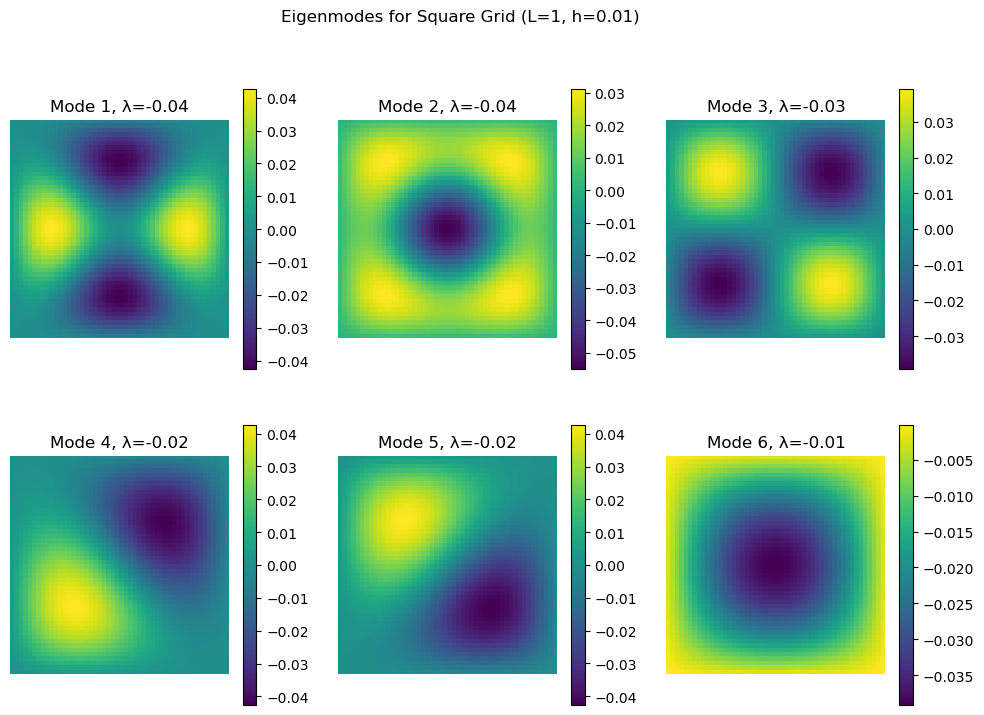

In [33]:
eigenvalue_square_50 = np.real(eigenvalue_square_50)
eigenvector_square_50 = np.real(eigenvector_square_50)

n = 50
index_of_smallest_eigenvalue = np.argsort(eigenvalue_square_50)[:k]
eigenmodes = [eigenvector_square_50[:, idx].reshape((n, n)) for idx in index_of_smallest_eigenvalue]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    im = ax.imshow(eigenmodes[i])
    ax.set_title(f"Mode {i+1}, λ={eigenvalue_square_50[index_of_smallest_eigenvalue[i]]:.2f}")
    ax.axis("off")
    fig.colorbar(im, ax=ax)
plt.suptitle("Eigenmodes for Square Grid (L=1, h=0.01)")
plt.show()

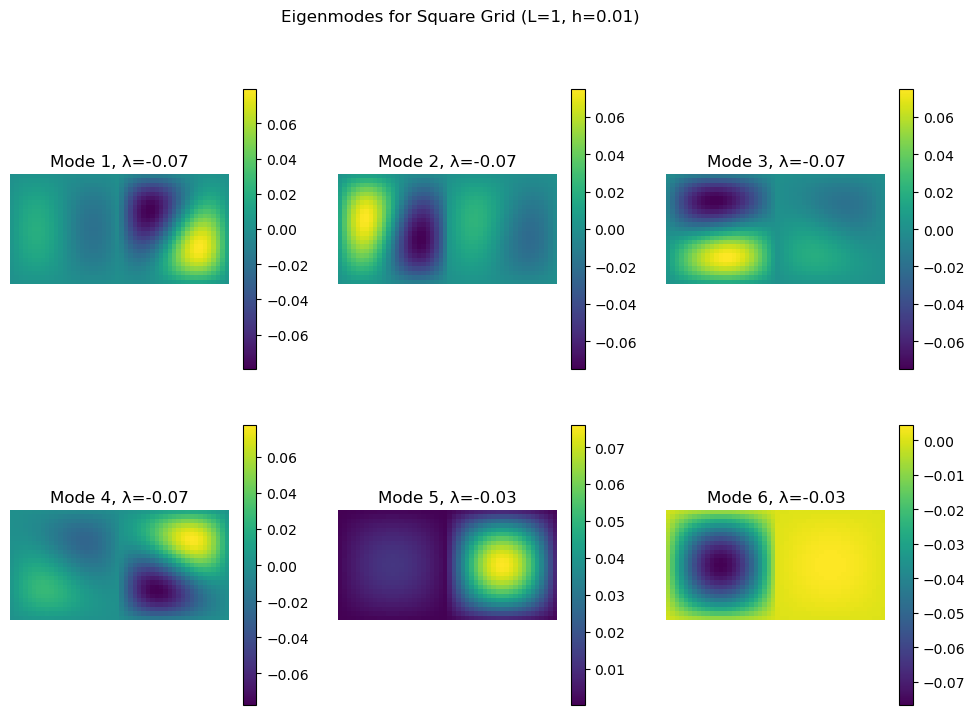

In [12]:
eigenvalue_rectangle_50 = np.real(eigenvalue_rectangle_50)
eigenvector_rectangle_50 = np.real(eigenvector_rectangle_50)

n = 50
index_of_smallest_eigenvalue = np.argsort(eigenvalue_rectangle_50)[:k]
eigenmodes = [eigenvector_rectangle_50[:, idx].reshape((25, 50)) for idx in index_of_smallest_eigenvalue]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    im = ax.imshow(eigenmodes[i])
    ax.set_title(f"Mode {i+1}, λ={eigenvalue_rectangle_50[index_of_smallest_eigenvalue[i]]:.2f}")
    ax.axis("off")
    fig.colorbar(im, ax=ax)

plt.suptitle("Eigenmodes for Square Grid (L=1, h=0.01)")
plt.show()

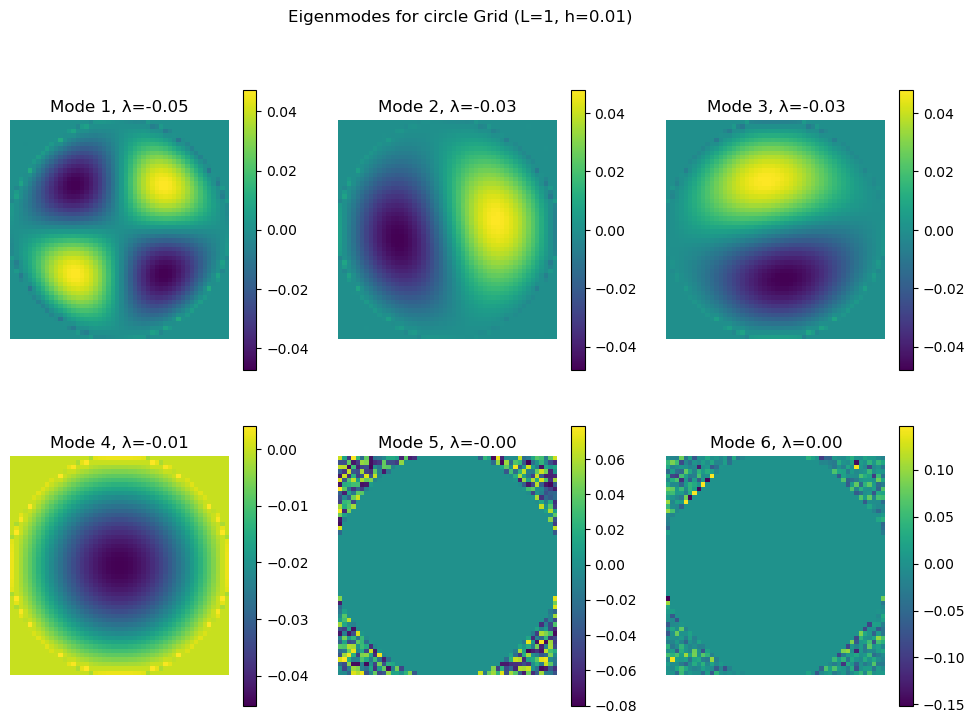

In [25]:
eigenvalue_circle_50 = np.real(eigenvalue_circle_50)
eigenvector_circle_50 = np.real(eigenvector_circle_50)
n = 50

index_of_smallest_eigenvalue = np.argsort(eigenvalue_circle_50)[:k]
eigenmodes = [eigenvector_circle_50[:, idx].reshape((n, n)) for idx in index_of_smallest_eigenvalue]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    im = ax.imshow(eigenmodes[i])
    ax.set_title(f"Mode {i+1}, λ={eigenvalue_circle_50[index_of_smallest_eigenvalue[i]]:.2f}")
    ax.axis("off")
    fig.colorbar(im, ax=ax)
plt.suptitle("Eigenmodes for circle Grid (L=1, h=0.01)")
plt.show()

# Question 3.C
For higher performance you can try sparse matrices: scipy.sparse.
linalg.eigs(). Show the difference in speed.

## Answer
We measure the time it takes to run for a grid of 100 x 100 we time it with the function time() this results in when we use function eigs() with calculating smallest 10 eigenvalues in a time of 0.646 seconds and for eigh() when its calculating all the eigenvalues results in 499.457 which clearly shows that eigs() is way faster due to only calculating a few of the eigenvalues instead of them all

In [14]:
square_sparse = sp.csr_matrix(square_100)
start_sparse = time.time()
eigenvalues_sparse, _ = eigs(square_sparse, k=10, which='SM') # sm geeft kleinste eigenvalues
end_sparse = time.time()
print(f"It takes scipy sparse eigs {end_sparse - start_sparse:.6f} seconds")

start_dense = time.time()
eigenvalues_dense, _ = eigh(square_100) 
end_dense = time.time()
print(f"It takes scipy eigh {end_dense - start_dense:.6f} seconds")

It takes scipy sparse eigs 1.274107 seconds
It takes scipy eigh 1157.663124 seconds


# Question 3.D
How does the spectrum of eigenfrequencies depend on the size L? Plot
the eigenfrequencies for each shape as a function of L. Do the frequencies depend
on the number of discretization steps?

## 
We take L values = [0.5,1,1.5] and h = 0.01 then with that we calculate the gridsize n = L/h and take the closest integer value of that. 

Since we solve:

\begin{equation} M v = K h^2 v \end{equation}

the eigenvalues of M  correspond to $K h^2$, meaning we obtain eigenvalues:

\begin{equation} K = \frac{\lambda}{h^2} \end{equation}

From the oscillatory solution, the eigenfrequencies are given by:

\begin{equation} \omega = \sqrt{-K} = \frac{\sqrt{-\lambda}}{h} \end{equation}


0.5
1
1.5


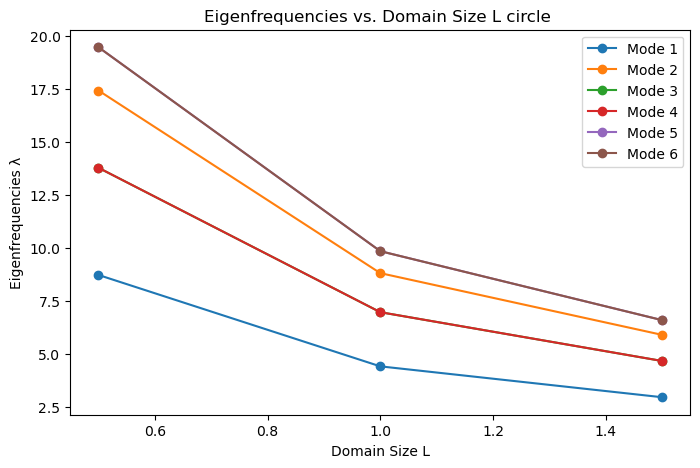

In [26]:
L_values = [0.5,1,1.5]  
h = 0.01
eigenfrequencies = []

for L in L_values:
    print(L)
    n = int(L / h) 
    laplacian_square_sparse = csr_matrix(laplacian_square(n))
    eigenvalues, _ = eigs(laplacian_square_sparse, k=6, which='SM')
    eigenvalues = np.real(eigenvalues)     
    eigenfrequencies.append(np.sqrt(-1*eigenvalues) / h)

plt.figure(figsize=(8,5))
for i in range(6):
    plt.plot(L_values, [freqs[i] for freqs in eigenfrequencies], marker='o', label=f"Mode {i+1}")
    
plt.xlabel("Domain Size L")
plt.ylabel("Eigenfrequencies λ")
plt.title("Eigenfrequencies vs. Domain Size L circle ")
plt.legend()
plt.show()

0.5
1
1.5


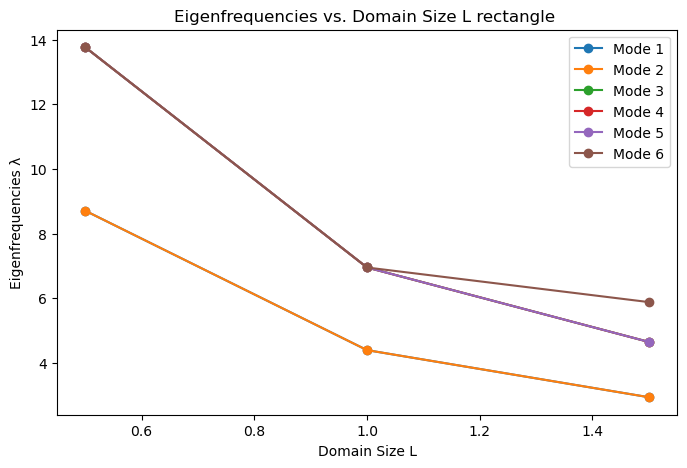

In [29]:
eigenfrequencies_rec = []
for L in L_values:
    print(L)
    n = int(L / h)  
    m = 2 * n 
    laplacian_rec_sparse = csr_matrix(laplacian_rectangle(n,m))
    eigenvalues, _ = eigs(laplacian_rec_sparse, k=k, which='SM')
    eigenvalues = np.real(eigenvalues)
    
    eigenfrequencies_rec.append(np.sqrt(-1 * eigenvalues) / h)
plt.figure(figsize=(8,5))
for i in range(6):
    plt.plot(L_values, [freqs[i] for freqs in eigenfrequencies_rec], marker='o', label=f"Mode {i+1}")
    
plt.xlabel("Domain Size L")
plt.ylabel("Eigenfrequencies λ")
plt.title("Eigenfrequencies vs. Domain Size L rectangle ")
plt.legend()
plt.show()

In [30]:
eigenfrequencies_circ = []
for L in L_values:
    print(L)
    n = int(L / h) 
    laplacian_circ_sparse = csr_matrix(laplacian_circle(n,L))
    eigenvalues, _ = eigs(laplacian_circ_sparse, k=6, which='SM')
    eigenvalues = np.real(eigenvalues)     
    eigenfrequencies_circ.append(np.sqrt(-1*eigenvalues) / h)

plt.figure(figsize=(8,5))
for i in range(6):
    plt.plot(L_values, [freqs[i] for freqs in eigenfrequencies_circ], marker='o', label=f"Mode {i+1}")
    
plt.xlabel("Domain Size L")
plt.ylabel("Eigenfrequencies λ")
plt.title("Eigenfrequencies vs. Domain Size L circle ")
plt.legend()
plt.show()

0.5


/var/folders/3v/6kq_73ns7j57377v07xc6t_40000gn/T/ipykernel_23387/2870413389.py:8: RuntimeWarning: invalid value encountered in sqrt
  eigenfrequencies_circ.append(np.sqrt(-1*eigenvalues) / h)


1


ArpackNoConvergence: ARPACK error -1: No convergence (100001 iterations, 5/6 eigenvectors converged)

# Question 3.2E
E. (1 point) Use eq. 20 and the solutions to eq. 24 to construct time-dependent
solutions. Show how the first few eigenmodes behave in time. Try to make an
animated plot of some eigenmodes for one of the three systems

## Answer

If $( K $) is negative, we define $( \lambda^2 = -K $) and obtain the oscillatory solution:

\begin{equation}
T(t) = A \cos(c \lambda t) + B \sin(c \lambda t)
\end{equation}

where $( \lambda = \sqrt{-K} $) represents the eigenfrequency.

To determine ( A ) and B), we need initial conditions. The initial displacement is given as $( u(x, y, 0) $)
and the initial velocity as $( \frac{\partial u}{\partial t} (x, y, 0) $).

Using the general solution:

\begin{equation}
u(x, y, 0) = A \cos(0)+ B \sin(0) = A
\end{equation}

\begin{equation}
\frac{\partial u}{\partial t} (x, y, 0) = -A c \lambda \sin(0) + B c \lambda \cos(0) = B c \lambda
\end{equation}

we solve for $(A)$ and $( B )$:

\begin{equation}
A = u(x, y, 0)
\end{equation}

\begin{equation}
B = \frac{1}{c \lambda} \frac{\partial u}{\partial t} (x, y, 0)
\end{equation}

to calculate it we take dt = 0.1 and 100 timesteps, c = 1 square grid of n = 50, and k smallest points

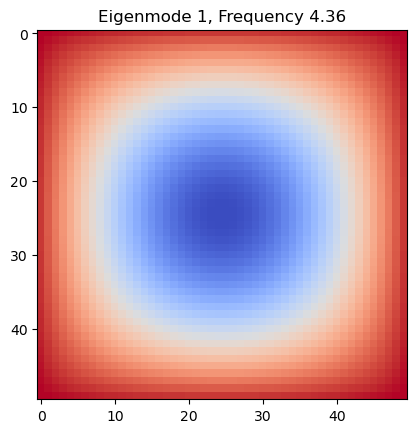

In [31]:
# for each specific eigenmode we have a value for K (which is negative), 
# hence we have a value for \lambda. 
# we still need initial conditions to obtain A and B is equation (22).
dt = 0.1 
time_steps = 100  
c = 1 
n = 50 
k = 6  
square_50 = laplacian_square(n)
eigenvalues, eigenvectors = eigs(square_50, k=k, which='SM')
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)


eigenmode = eigenvectors[:, index].reshape((n, n))
h = 1/n
eigenfrequency = np.sqrt(-1*eigenvalues[0]) / h
initial_displacement = eigenmode.copy()
# initiele velocity nul 
initial_velocity = np.zeros_like(eigenmode)

A = initial_displacement
B = (initial_velocity / (c * eigenfrequency))


fig, ax = plt.subplots()
cmap = ax.imshow(eigenmode, animated=True, cmap='coolwarm')
ax.set_title(f"Eigenmode {index+1}, Frequency {eigenfrequency:.2f}")

# Animation function
def update(frame):
    t = frame * dt
    u_t = A * np.cos(c * eigenfrequency * t) +B * np.sin(c * eigenfrequency *t)
    cmap.set_array(u_t)
    return cmap,
ani = animation.FuncAnimation(fig, update, frames=time_steps)

display(HTML(ani.to_jshtml())) 